In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('satislar.csv')
df.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe()

,Aylar,Satislar
count,30.000000,30.000000
mean,33.333333,36592.400000
std,17.131003,14876.425816
min,8.000000,4697.000000
25%,20.000000,28003.000000
50%,30.000000,31915.750000
75%,47.750000,50272.375000
max,65.000000,61195.500000


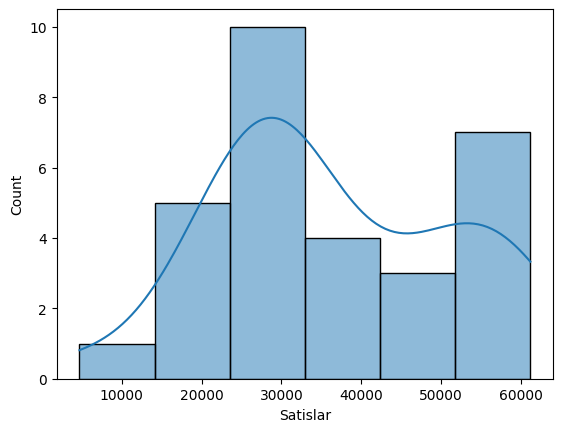

In [5]:
import seaborn as sns
sns.histplot(df['Satislar'],kde=True);

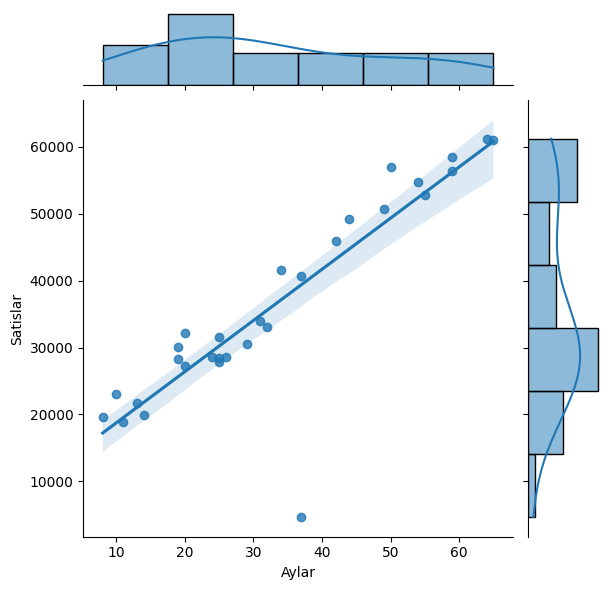

In [6]:
sns.jointplot(x='Aylar',y='Satislar',data=df,kind='reg');

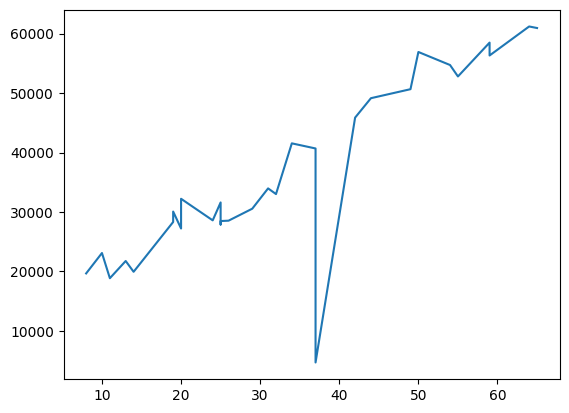

In [7]:
import matplotlib.pyplot as plt
plt.plot(df['Aylar'],df['Satislar']);

In [8]:
import warnings
warnings.filterwarnings('ignore')

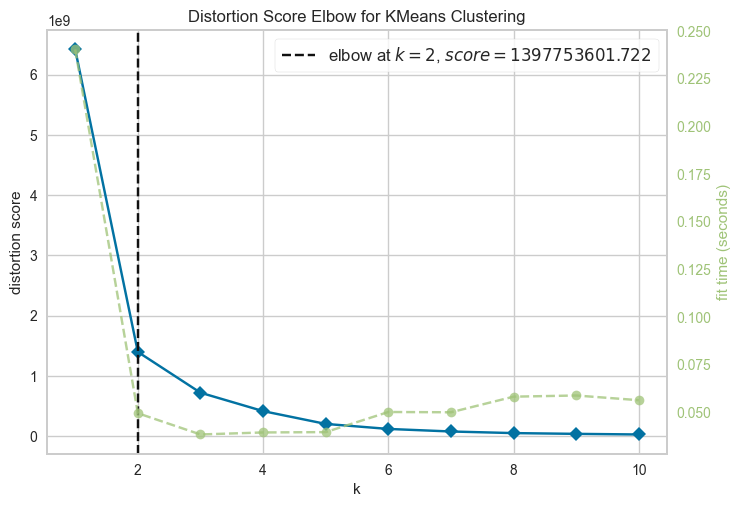

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,11))
visualizer.fit(df)
visualizer.poof();

In [10]:
kmeans_model=KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_model.fit(df)

KMeans(n_clusters=2, random_state=42)

In [11]:
df['cluster']=kmeans_model.labels_
centers=kmeans_model.cluster_centers_

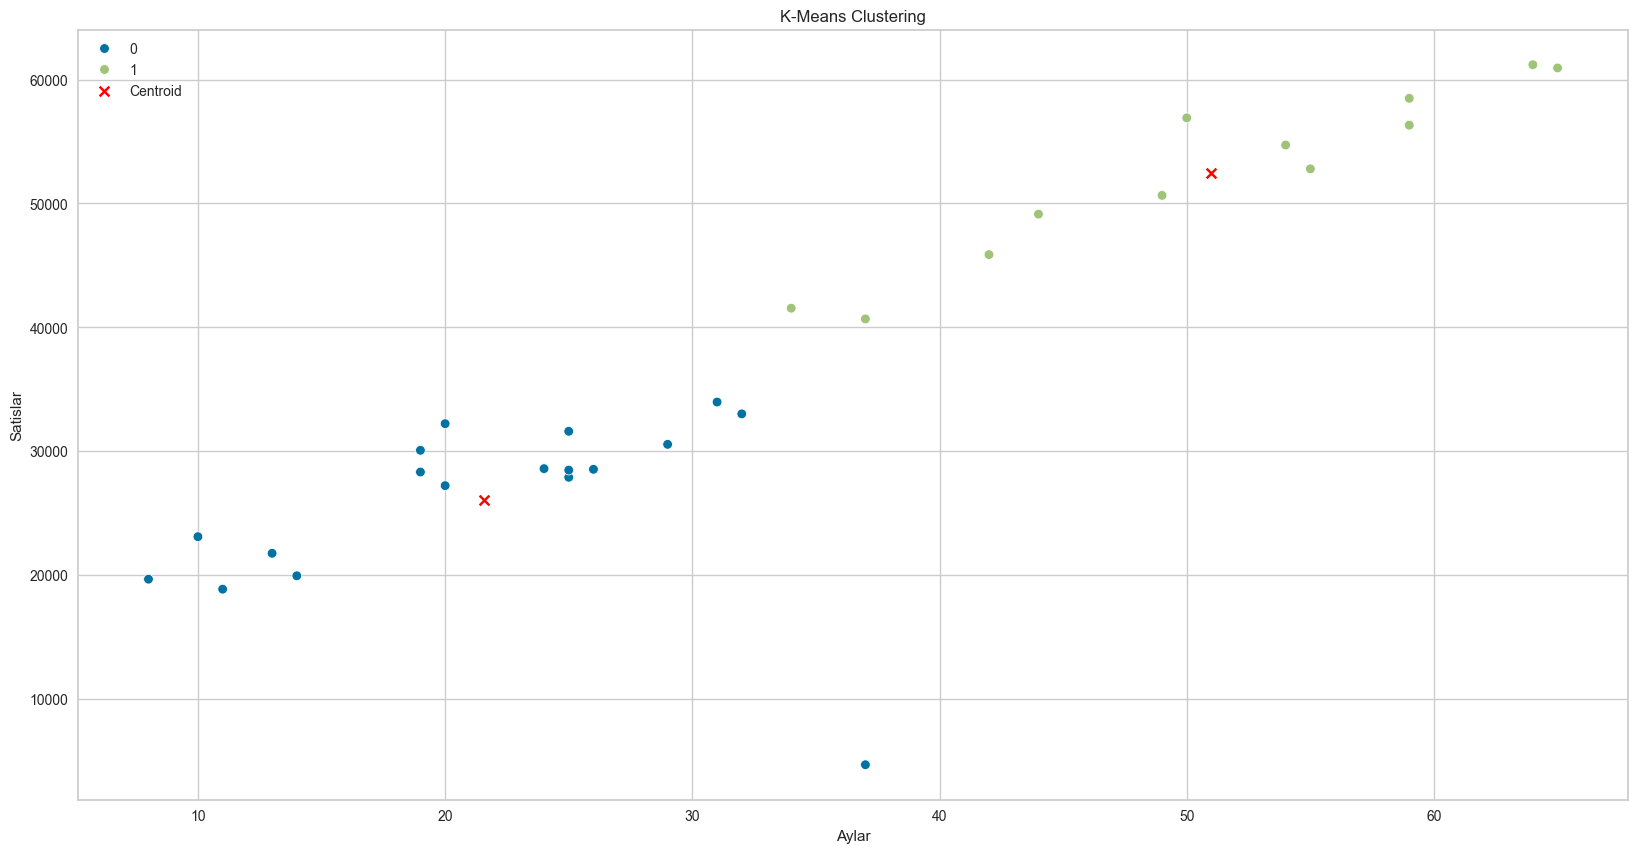

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Aylar',y='Satislar',hue='cluster',data=df)
plt.scatter(centers[:,0],centers[:,1],label='Centroid',c='red',marker="x")
plt.title('K-Means Clustering')
plt.xlabel('Aylar')
plt.ylabel('Satislar')
plt.legend()
plt.show();

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
x=df["Aylar"]
y=df["Satislar"]

In [15]:
x=sc.fit_transform(x.values.reshape(-1,1))
y=sc.fit_transform(y.values.reshape(-1,1))

In [16]:
import statsmodels.api as sm

In [17]:
model=sm.OLS(y,x)
lm_model=model.fit()

In [18]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              99.54
Date:                Sat, 30 Aug 2025   Prob (F-statistic):                    6.96e-11
Time:                        13:28:58   Log-Likelihood:                         -20.234
No. Observations:                  30   AIC:                                      42.47
Df Residuals:                      29   BIC:                                      43.87
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8800      0.088      9.977      0.000       0.700       1.060
==============================================================================
Omnibus:                       59.356   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.532
Skew:                          -4.054   Prob(JB):                    7.43e-105
Kurtosis:                      20.829   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()
lr_model=lr.fit(x,y)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
y_pred=lr_model.predict(x)

In [23]:
np.sqrt(mean_squared_error(y,y_pred))

0.47499145635484946

In [24]:
from sklearn.svm import SVR

In [25]:
svm_model=SVR(kernel='linear').fit(x,y)

In [26]:
np.sqrt(mean_squared_error(y,svm_model.predict(x)))

0.47842264372544835

In [30]:
-cross_val_score(lr_model,x,y,cv=10).mean()

1.4755475782783647

In [31]:
-cross_val_score(svm_model,x,y,cv=10).mean()

1.773871723017455